<a href="https://colab.research.google.com/github/ganeshgani7/customer_feedback_sentiment/blob/main/Customer_Feedback_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Necessary Libraries

In [1]:
import pandas as pd
import sqlite3
import numpy as np

##Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Path Of The Dataset

In [3]:
path = '/content/drive/MyDrive/Customer_Sentiment/test.ft.txt.bz2'
print(path)

/content/drive/MyDrive/Customer_Sentiment/test.ft.txt.bz2


##Extract Labeled Text Data from a Compressed .bz2 File into a DataFrame

In [4]:
import bz2
def extractData(filename):
    data = []
    with bz2.open(filename, 'rt', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                label, text = parts
                data.append((label, text))

    data = pd.DataFrame(data, columns=['label', 'text'])
    data['label'] = data['label'].str.extract(r'(\d+)').astype(int)
    return data

In [5]:
data = extractData(path)
data.head(10)

,label,text
0,2,Great CD: My lovely Pat has one of the GREAT v...
1,2,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ...: I bought thi...
3,2,"works fine, but Maha Energy is better: Check o..."
4,2,Great for the non-audiophile: Reviewed quite a...
5,1,DVD Player crapped out after one year: I also ...
6,1,"Incorrect Disc: I love the style of this, but ..."
7,1,DVD menu select problems: I cannot scroll thro...
8,2,Unique Weird Orientalia from the 1930's: Exoti...
9,1,"Not an ""ultimate guide"": Firstly,I enjoyed the..."


##Install and Load VADER Sentiment Lexicon for Text Sentiment Analysis using NLTK

In [6]:
!pip install nltk

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

##Generate Sentiment Scores and Labels from Text using NLTK VADER Analyzer

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    return score
data['sentiment_score'] = data['text'].apply(get_sentiment)
data['sentiment_label'] = data['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

In [9]:
data.head(25)

,label,text,sentiment_score,sentiment_label
0,2,Great CD: My lovely Pat has one of the GREAT v...,0.9569,Positive
1,2,One of the best game music soundtracks - for a...,0.8770,Positive
2,1,Batteries died within a year ...: I bought thi...,0.7297,Positive
3,2,"works fine, but Maha Energy is better: Check o...",0.7845,Positive
4,2,Great for the non-audiophile: Reviewed quite a...,0.8388,Positive
5,1,DVD Player crapped out after one year: I also ...,-0.3506,Negative
6,1,"Incorrect Disc: I love the style of this, but ...",-0.0638,Negative
7,1,DVD menu select problems: I cannot scroll thro...,0.2329,Positive
8,2,Unique Weird Orientalia from the 1930's: Exoti...,0.1280,Positive
9,1,"Not an ""ultimate guide"": Firstly,I enjoyed the...",0.9633,Positive


##Map Numerical Labels to Rating Categories using Conditional Logic

In [10]:
data['ratings'] = data['label'].apply(
    lambda x: '4 or 5' if str(x).strip() == '2' else ('1 or 2' if str(x).strip() == '1' else 'Unknown Rating')
)

In [11]:
data.head(25)

,label,text,sentiment_score,sentiment_label,ratings
0,2,Great CD: My lovely Pat has one of the GREAT v...,0.9569,Positive,4 or 5
1,2,One of the best game music soundtracks - for a...,0.8770,Positive,4 or 5
2,1,Batteries died within a year ...: I bought thi...,0.7297,Positive,1 or 2
3,2,"works fine, but Maha Energy is better: Check o...",0.7845,Positive,4 or 5
4,2,Great for the non-audiophile: Reviewed quite a...,0.8388,Positive,4 or 5
5,1,DVD Player crapped out after one year: I also ...,-0.3506,Negative,1 or 2
6,1,"Incorrect Disc: I love the style of this, but ...",-0.0638,Negative,1 or 2
7,1,DVD menu select problems: I cannot scroll thro...,0.2329,Positive,1 or 2
8,2,Unique Weird Orientalia from the 1930's: Exoti...,0.1280,Positive,4 or 5
9,1,"Not an ""ultimate guide"": Firstly,I enjoyed the...",0.9633,Positive,1 or 2


##Visualize Sentiment Score Distribution and Generate Word Cloud for Negative Reviews

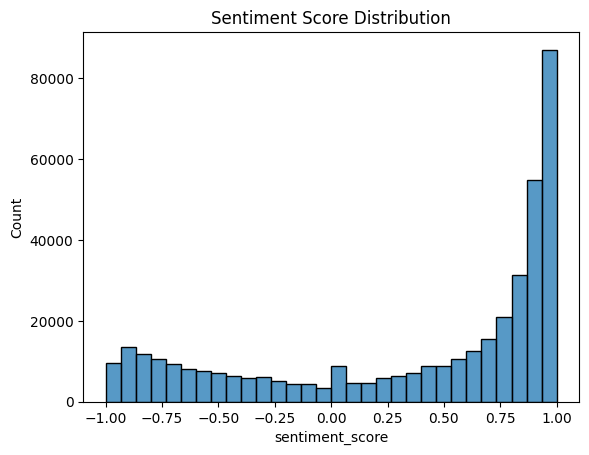

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Sentiment score distributions
sns.histplot(data['sentiment_score'], bins=30)
plt.title('Sentiment Score Distribution')
plt.show()

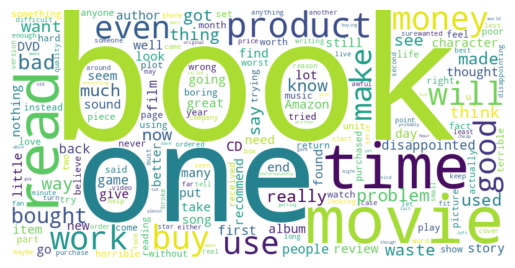

In [13]:
#Word Cloud for Negative Reviews
negative_reviews = ' '.join(data[data['sentiment_label'] == 'Negative']['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Establish Connection to SQLite Database for Customer Sentiment Analysis

In [14]:
conn = sqlite3.connect('/content/drive/MyDrive/Customer_Sentiment/customer_sentiment.db')

##Create 'sentiment' Table in SQLite Database to Store Text, Sentiment Scores, and Ratings

In [15]:
conn.execute("""
CREATE TABLE IF NOT EXISTS sentiment (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    text TEXT,
    sentiment_score REAL,
    rating REAL);
""")

##Sentiment Table Metadata

In [16]:
table_metadata = pd.read_sql_query("PRAGMA table_info(sentiment);", conn)
table_metadata

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,text,TEXT,0,None,0
2,2,sentiment_score,REAL,0,None,0
3,3,rating,REAL,0,None,0


In [17]:
data_check = pd.read_sql_query("select * from sentiment;", conn)
data_check

,id,text,sentiment_score,rating


##Insert Text, Sentiment Scores, and Ratings into the 'sentiment' Table in SQLite Database

In [18]:
for _, data in data.iterrows():
  conn.execute('''
  insert into sentiment(text,sentiment_score,rating)
  values(?,?,?)''', (data['text'],data['sentiment_score'],data['ratings']))

conn.commit

<function Connection.commit()>

In [19]:
data_check_1 = pd.read_sql_query("select * from sentiment", conn)
data_check_1

,id,text,sentiment_score,rating
0,1,Great CD: My lovely Pat has one of the GREAT v...,0.9569,4 or 5
1,2,One of the best game music soundtracks - for a...,0.8770,4 or 5
2,3,Batteries died within a year ...: I bought thi...,0.7297,1 or 2
3,4,"works fine, but Maha Energy is better: Check o...",0.7845,4 or 5
4,5,Great for the non-audiophile: Reviewed quite a...,0.8388,4 or 5
...,...,...,...,...
399995,399996,Unbelievable- In a Bad Way: We bought this Tho...,0.5932,1 or 2
399996,399997,"Almost Great, Until it Broke...: My son reciev...",-0.4510,1 or 2
399997,399998,Disappointed !!!: I bought this toy for my son...,0.6632,1 or 2
399998,399999,Classic Jessica Mitford: This is a compilation...,0.9217,4 or 5


##1. Positive Feedback Rate

In [20]:
query = """
SELECT
1.0 * SUM(CASE WHEN sentiment_score > 0.05 THEN 1 ELSE 0 END) / COUNT(*) AS positive_feedback_rate
FROM sentiment;
"""
pd.read_sql_query(query, conn)

,positive_feedback_rate
0,0.6988


##2. Negative Feedback Rate

In [21]:
query = """
SELECT
1.0 * SUM(CASE WHEN sentiment_score < -0.05 THEN 1 ELSE 0 END) / COUNT(*) AS negative_feedback_rate
FROM sentiment;
"""
pd.read_sql_query(query, conn)

,negative_feedback_rate
0,0.276313


##3. Average Sentiment Score

In [22]:
query = """
SELECT
AVG(sentiment_score) AS average_sentiment_score
FROM sentiment;
"""
pd.read_sql_query(query, conn)

,average_sentiment_score
0,0.369767


##4. Top Complaints

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
import re
from collections import Counter
query = "SELECT text FROM sentiment WHERE sentiment_score < -0.05"
df_negative = pd.read_sql_query(query, conn)

text_data = ' '.join(df_negative['text'].dropna())

tokens = re.findall(r'\b\w+\b', text_data.lower())
filtered_tokens = [word for word in tokens if word not in stop_words]

common_words = Counter(filtered_tokens).most_common(20)

print("Top Complaint Keywords in Negative Reviews:")
for word, count in common_words:
    print(f"{word}: {count}")

Top Complaint Keywords in Negative Reviews:
book: 54504
one: 41754
would: 27952
like: 25813
movie: 22244
time: 22096
get: 22032
good: 20484
even: 19520
bad: 18603
read: 17963
product: 17851
buy: 16595
really: 15693
money: 15563
first: 15127
much: 13614
work: 13320
use: 12786
could: 12778


## SQL Implementation Plan

###1. Table: reviews(id, product_id, text, sentiment_score, rating)

In [25]:
result = pd.read_sql_query("select * from sentiment", conn)
result

,id,text,sentiment_score,rating
0,1,Great CD: My lovely Pat has one of the GREAT v...,0.9569,4 or 5
1,2,One of the best game music soundtracks - for a...,0.8770,4 or 5
2,3,Batteries died within a year ...: I bought thi...,0.7297,1 or 2
3,4,"works fine, but Maha Energy is better: Check o...",0.7845,4 or 5
4,5,Great for the non-audiophile: Reviewed quite a...,0.8388,4 or 5
...,...,...,...,...
399995,399996,Unbelievable- In a Bad Way: We bought this Tho...,0.5932,1 or 2
399996,399997,"Almost Great, Until it Broke...: My son reciev...",-0.4510,1 or 2
399997,399998,Disappointed !!!: I bought this toy for my son...,0.6632,1 or 2
399998,399999,Classic Jessica Mitford: This is a compilation...,0.9217,4 or 5


### 2. Calculate aggregates by sentiment group.

In [26]:
query = """
SELECT
  CASE
    WHEN sentiment_score > 0.05 THEN 'Positive'
    WHEN sentiment_score < -0.05 THEN 'Negative'
    ELSE 'Neutral'
  END AS sentiment_group,
  COUNT(*) AS total_reviews,
  AVG(sentiment_score) AS avg_sentiment_score
FROM sentiment
GROUP BY sentiment_group;
"""

df_summary = pd.read_sql_query(query, conn)
print(df_summary)

  sentiment_group  total_reviews  avg_sentiment_score
0        Negative         110525            -0.612562
1         Neutral           9955             0.000320
2        Positive         279520             0.771347


##Python Implementation Plan

### 1.	Use NLP tools to assign sentiment.

[Click me to view the following cell block](#scrollTo=3WObnYRUMXme&line=6&uniqifier=1)

###2. Generate sentiment score distributions and review word clouds.

[Click me to view Sentiment Score Distribution](#scrollTo=3WObnYRUMXme&line=4&uniqifier=1)


[Click me to view Word Clouds](#scrollTo=01MKm_0VjaIi&line=6&uniqifier=1)